# TBS

## preparing

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import hddm
import numpy as np
import pickle
from patsy import dmatrices, dmatrix, demo_data
cm = 1/2.54

## loading data

In [2]:
data = hddm.load_csv('exp2_DDM.csv')
data.at[data['step_att'].isin(['4']),'step_att']=2
data.at[data['step_att'].isin(['5']),'step_att']=1
data = hddm.utils.flip_errors(data)
data.head(10)

,subj_idx,group_idx,turn_type,task_type,snr_type,trial_num,step_att,response,rt,step_unatnd
0,55,Larynx,Left iTBS,Tone,Clear,1,3,1,1.083317,1
1,55,Larynx,Left iTBS,Tone,Clear,2,2,1,0.744397,1
2,55,Larynx,Left iTBS,Tone,Clear,3,2,1,0.732525,1
3,55,Larynx,Left iTBS,Tone,Clear,4,1,1,0.800199,1
4,55,Larynx,Left iTBS,Tone,Clear,5,2,1,0.753649,1
5,55,Larynx,Left iTBS,Tone,Clear,6,2,1,0.544652,1
6,55,Larynx,Left iTBS,Tone,Clear,7,1,1,0.621313,1
7,55,Larynx,Left iTBS,Tone,Clear,8,1,1,0.580819,1
8,55,Larynx,Left iTBS,Tone,Clear,9,1,0,-0.496794,1
9,55,Larynx,Left iTBS,Tone,Clear,10,3,1,0.863869,1


## right stim, consonant, clear

### preparing data

In [3]:
D_R=data.loc[data['turn_type'].isin(['Right cTBS','Sham'])]
D_R_T=D_R.loc[D_R['task_type']=='Tone']
D_R_T_Q=D_R_T.loc[D_R_T['snr_type']=='Clear']
print(D_R_T_Q)
D_R_T_Q.to_csv('Exp2_D_R_T_Q_cTBS.csv')

       subj_idx group_idx   turn_type task_type snr_type  trial_num  step_att  \
1872         55    Larynx  Right cTBS      Tone    Clear          1         2   
1873         55    Larynx  Right cTBS      Tone    Clear          2         2   
1874         55    Larynx  Right cTBS      Tone    Clear          3         1   
1875         55    Larynx  Right cTBS      Tone    Clear          4         2   
1876         55    Larynx  Right cTBS      Tone    Clear          5         1   
1877         55    Larynx  Right cTBS      Tone    Clear          6         2   
1878         55    Larynx  Right cTBS      Tone    Clear          7         1   
1879         55    Larynx  Right cTBS      Tone    Clear          8         2   
1880         55    Larynx  Right cTBS      Tone    Clear          9         1   
1881         55    Larynx  Right cTBS      Tone    Clear         10         2   
1882         55    Larynx  Right cTBS      Tone    Clear         11         2   
1883         55    Larynx  R

### baseline model

In [4]:
a_reg = {'model': "a ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_R_T_Q_bsl = hddm.HDDMRegressor(D_R_T_Q, reg_descr, include='z')
D_R_T_Q_bsl.find_starting_values()
D_R_T_Q_bsl.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_C(turn_type, Treatment('Sham'))[T.Right cTBS]"]
Adding these covariates:
['v_Intercept', "v_C(turn_type, Treatment('Sham'))[T.Right cTBS]"]
Adding these covariates:
['z_Intercept', "z_C(turn_type, Treatment('Sham'))[T.Right cTBS]"]


/home/bsliang/miniconda3/envs/bsliang_DDM_27/lib/python2.7/site-packages/scipy/optimize/optimize.py:1934: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2001 of 2000 complete in 3864.3 sec

### model 1: a only

In [5]:
a_reg = {'model': "a ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_R_T_Q_am = hddm.HDDMRegressor(D_R_T_Q, reg_descr, include='z')
D_R_T_Q_am.find_starting_values()
D_R_T_Q_am.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_step_att:C(turn_type, Treatment('Sham'))[Right cTBS]", "a_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['v_Intercept', "v_C(turn_type, Treatment('Sham'))[T.Right cTBS]"]
Adding these covariates:
['z_Intercept', "z_C(turn_type, Treatment('Sham'))[T.Right cTBS]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 4570.4 sec

### model 2: v only

In [6]:
a_reg = {'model': "a ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_R_T_Q_vm = hddm.HDDMRegressor(D_R_T_Q, reg_descr, include='z')
D_R_T_Q_vm.find_starting_values()
D_R_T_Q_vm.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_C(turn_type, Treatment('Sham'))[T.Right cTBS]"]
Adding these covariates:
['v_Intercept', "v_step_att:C(turn_type, Treatment('Sham'))[Right cTBS]", "v_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['z_Intercept', "z_C(turn_type, Treatment('Sham'))[T.Right cTBS]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 4436.8 sec

### model 3: z only

In [7]:
a_reg = {'model': "a ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_R_T_Q_zm = hddm.HDDMRegressor(D_R_T_Q, reg_descr, include='z')
D_R_T_Q_zm.find_starting_values()
D_R_T_Q_zm.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_C(turn_type, Treatment('Sham'))[T.Right cTBS]"]
Adding these covariates:
['v_Intercept', "v_C(turn_type, Treatment('Sham'))[T.Right cTBS]"]
Adding these covariates:
['z_Intercept', "z_step_att:C(turn_type, Treatment('Sham'))[Right cTBS]", "z_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 4604.1 sec

### model 4: a + v

In [8]:
a_reg = {'model': "a ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_R_T_Q_avm = hddm.HDDMRegressor(D_R_T_Q, reg_descr, include='z')
D_R_T_Q_avm.find_starting_values()
D_R_T_Q_avm.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_step_att:C(turn_type, Treatment('Sham'))[Right cTBS]", "a_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['v_Intercept', "v_step_att:C(turn_type, Treatment('Sham'))[Right cTBS]", "v_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['z_Intercept', "z_C(turn_type, Treatment('Sham'))[T.Right cTBS]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 4948.1 sec

### model 5: a + z

In [9]:
a_reg = {'model': "a ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_R_T_Q_azm = hddm.HDDMRegressor(D_R_T_Q, reg_descr, include='z')
D_R_T_Q_azm.find_starting_values()
D_R_T_Q_azm.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_step_att:C(turn_type, Treatment('Sham'))[Right cTBS]", "a_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['v_Intercept', "v_C(turn_type, Treatment('Sham'))[T.Right cTBS]"]
Adding these covariates:
['z_Intercept', "z_step_att:C(turn_type, Treatment('Sham'))[Right cTBS]", "z_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 5205.2 sec

### model 6: v + z

In [10]:
a_reg = {'model': "a ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_R_T_Q_vzm = hddm.HDDMRegressor(D_R_T_Q, reg_descr, include='z')
D_R_T_Q_vzm.find_starting_values()
D_R_T_Q_vzm.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_C(turn_type, Treatment('Sham'))[T.Right cTBS]"]
Adding these covariates:
['v_Intercept', "v_step_att:C(turn_type, Treatment('Sham'))[Right cTBS]", "v_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['z_Intercept', "z_step_att:C(turn_type, Treatment('Sham'))[Right cTBS]", "z_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 4981.5 sec

### model 7: a + v + z

In [11]:
a_reg = {'model': "a ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_R_T_Q_fm = hddm.HDDMRegressor(D_R_T_Q, reg_descr, include='z')
D_R_T_Q_fm.find_starting_values()
D_R_T_Q_fm.sample(2000, burn=20, dbname='traces.db', db='pickle')
D_R_T_Q_fm.save('D_R_T_Q_fm')

Adding these covariates:
['a_Intercept', "a_step_att:C(turn_type, Treatment('Sham'))[Right cTBS]", "a_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['v_Intercept', "v_step_att:C(turn_type, Treatment('Sham'))[Right cTBS]", "v_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['z_Intercept', "z_step_att:C(turn_type, Treatment('Sham'))[Right cTBS]", "z_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 5584.9 secWARNING: Will not save custom link functions.


### Model comparison

baseline model DIC: 4617.340397
a model DIC: 4216.128202
v model DIC: 4290.213886
z model DIC: 4616.068136
av model DIC: 3833.850093
az model DIC: 4190.209834
vz model DIC: 4136.881126
full model DIC: 3766.128211


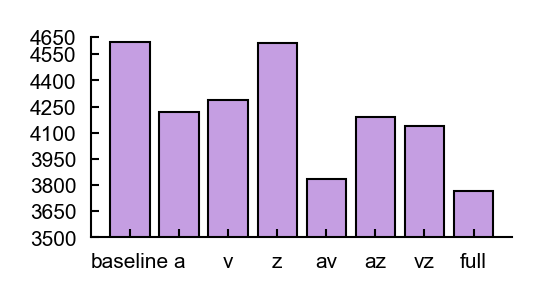

In [21]:
print("baseline model DIC: %f" % D_R_T_Q_bsl.dic)
print("a model DIC: %f" % D_R_T_Q_am.dic)
print("v model DIC: %f" % D_R_T_Q_vm.dic)
print("z model DIC: %f" % D_R_T_Q_zm.dic)
print("av model DIC: %f" % D_R_T_Q_avm.dic)
print("az model DIC: %f" % D_R_T_Q_azm.dic)
print("vz model DIC: %f" % D_R_T_Q_vzm.dic)
print("full model DIC: %f" % D_R_T_Q_fm.dic)

fig, ax = plt.subplots()

fruits = ['baseline', 'a', 'v', 'z', 'av', 'az', 'vz','full']
counts = [D_R_T_Q_bsl.dic, D_R_T_Q_am.dic, D_R_T_Q_vm.dic, D_R_T_Q_zm.dic,D_R_T_Q_avm.dic,D_R_T_Q_azm.dic,D_R_T_Q_vzm.dic,D_R_T_Q_fm.dic]

D_name='D_R_T_Q'

ax.bar(fruits, counts,color=[197./255,158./255,226./255],edgecolor='black',linewidth=0.5)

plt.rcParams['savefig.dpi']=300
plt.rcParams['axes.linewidth']=0.5

#ax.set_ylabel('DIC value')
#ax.set_title('TBS: Left cTBS consonant quiet')
ax.set_ylim([3500,4650])
ytick_plot=range(3500,4650,150)
ytick_plot.append(4650)
ax.set_yticks(ytick_plot)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.set_size_inches(4.6*cm,2.25*cm)
ax.tick_params('both',which='major',direction='in',width=0.5,length=2)
plt.rcParams['font.size']=5
plt.rcParams['font.family']='Arial'
plt.savefig(D_name+'_interact_M_compare.pdf',bbox_inches = 'tight',transparent=True)
plt.show()

### Plotting

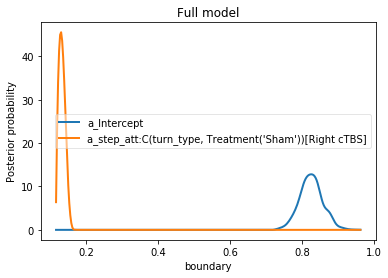

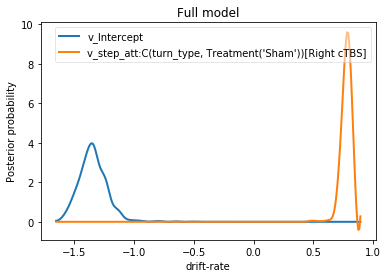

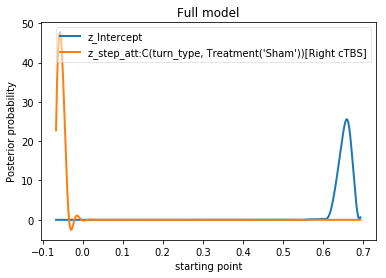

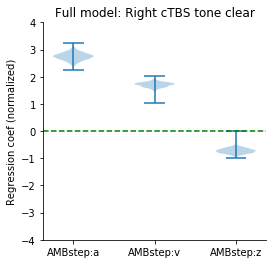

('P(a > Sham) = ', 1.0)
('P(v > Sham) = ', 1.0)
('P(z > Sham) = ', 0.000505050505050505)


In [13]:
a_Intercept,a_cTBS = D_R_T_Q_fm.nodes_db.loc[["a_Intercept","a_step_att:C(turn_type, Treatment('Sham'))[Right cTBS]"], 'node']
hddm.analyze.plot_posterior_nodes([a_Intercept,a_cTBS])
plt.xlabel('boundary')
plt.ylabel('Posterior probability')
plt.title('Full model')

v_Intercept,v_cTBS = D_R_T_Q_fm.nodes_db.loc[["v_Intercept","v_step_att:C(turn_type, Treatment('Sham'))[Right cTBS]"], 'node']
hddm.analyze.plot_posterior_nodes([v_Intercept,v_cTBS])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Full model')

z_Intercept,z_cTBS = D_R_T_Q_fm.nodes_db.loc[["z_Intercept","z_step_att:C(turn_type, Treatment('Sham'))[Right cTBS]"], 'node']
hddm.analyze.plot_posterior_nodes([z_Intercept,z_cTBS])
plt.xlabel('starting point')
plt.ylabel('Posterior probability')
plt.title('Full model')


fig, ax = plt.subplots()
fig.set_size_inches(4,4)

para_tag=['AMBstep:a','AMBstep:v','AMBstep:z']
counts = [a_cTBS.trace()/(max(a_cTBS.trace())-min(a_cTBS.trace())),v_cTBS.trace()/(max(v_cTBS.trace())-min(v_cTBS.trace())),z_cTBS.trace()/(max(z_cTBS.trace())-min(z_cTBS.trace()))]

ax.axhline(y = 0, color ="green", linestyle ="--")
ax.violinplot(counts)
ax.set_xticks([1,2,3])
ax.set_xticklabels(para_tag)
ax.set_ylim([-4,4])
ax.set_title('Full model: Right cTBS tone clear')
ax.set_ylabel('Regression coef (normalized)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

print("P(a > Sham) = ", (a_cTBS.trace() > 0).mean())
print("P(v > Sham) = ", (v_cTBS.trace() > 0).mean())
print("P(z > Sham) = ", (z_cTBS.trace() > 0).mean())

### check full model simulation prediction accuracy

#### fit the full model

In [14]:
fm_data_2=D_R_T_Q
fm_data_2.reset_index(inplace = True, drop = True)
a_reg = {'model': "a ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
fm_2 = hddm.HDDMRegressor(fm_data_2, reg_descr, include='z')
fm_2.find_starting_values()
fm_2.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_step_att:C(turn_type, Treatment('Sham'))[Right cTBS]", "a_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['v_Intercept', "v_step_att:C(turn_type, Treatment('Sham'))[Right cTBS]", "v_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['z_Intercept', "z_step_att:C(turn_type, Treatment('Sham'))[Right cTBS]", "z_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 5596.2 sec

#### predict data from simulated data derived from full model

In [15]:
fm_data_2_sim = hddm.utils.post_pred_gen(fm_2)
hddm.utils.post_pred_stats(fm_data_2, fm_data_2_sim)

 [-------------------112%-------------------] 28 of 25 complete in 24720.9 sec

,observed,mean,std,SEM,MSE,credible,quantile,mahalanobis
stat,,,,,,,,
accuracy,0.608462,0.607810,0.072893,4.241651e-07,0.005314,True,50.032001,0.008935
mean_ub,0.656109,0.677608,0.090565,4.622333e-04,0.008664,True,41.736000,0.237393
std_ub,0.237008,0.243968,0.057253,4.843920e-05,0.003326,True,51.112000,0.121562
10q_ub,0.444178,0.463891,0.066047,3.886039e-04,0.004751,True,34.560001,0.298468
30q_ub,0.536985,0.524430,0.071372,1.576188e-04,0.005252,True,59.271999,0.175905
50q_ub,0.610371,0.601835,0.081036,7.286837e-05,0.006640,True,55.944000,0.105340
70q_ub,0.701193,0.722540,0.099954,4.557272e-04,0.010447,True,43.911999,0.213576
90q_ub,0.897437,0.988720,0.151600,8.332523e-03,0.031315,True,30.896000,0.602128
mean_lb,-0.688245,-0.701604,0.101549,1.784485e-04,0.010491,True,54.944000,0.131547
